<a href="https://colab.research.google.com/github/tanisaur/forumla1-mini-sprint/blob/tanisha/formula1_mini_sprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/tanisaur/forumla1-mini-sprint.git


fatal: destination path 'forumla1-mini-sprint' already exists and is not an empty directory.


# **Team 19**

##**Scenario:**
We are a data consulting firm that has been hired by the worst performing constructor to help them hire a new team of drivers and improve their performance standings

##**Hypothesis**
Hiring a new team of drivers as well as possibly improving pit time could help improve the standings of our constructor.

##**Initial Data Exploration**

- Basic analysis of the top ten drivers historically.

- Identify current top performing drivers.

- Current standing of points drivers have.

- The average race lap times for the 2023 per driver?

- Possible exploration of pit stop times



# **Import libraries**

In [4]:
pip install fastf1

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fastf1 as ff1
%matplotlib inline

**Read in data**

In [11]:
# prompt:

import pandas as pd

driver_standings = pd.read_csv('//content/forumla1-mini-sprint/data/driver_standings.csv')
drivers = pd.read_csv('/content/forumla1-mini-sprint/data/drivers.csv')
results = pd.read_csv('/content/forumla1-mini-sprint/data/results.csv')
#constructors = pd.read_csv('/content/forumla1-mini-sprint/data/constructors.csv')
races = pd.read_csv('/content/forumla1-mini-sprint/data/races.csv')

#Only include necessary columns
drivers = drivers[["driverId", "driverRef", "nationality"]]
driver_standings = driver_standings[['driverId','raceId', 'points', 'position', 'wins']]
results = results[['raceId','constructorId','laps','time','milliseconds','rank','fastestLapTime', 'fastestLapSpeed']]
#constructors = constructors[['constructorId','constructorRef', 'nationality']]
races = races[['raceId','year','round','circuitId','name']]

In [36]:
# prompt: list the driverId with the most points and their points

most_points_driver = driver_standings.groupby('driverId')['points'].sum().sort_values(ascending=False).head(1)

print(f"Driver with the most points: {most_points_driver.index[0]} with {most_points_driver.values[0]} points")


Driver with the most points: 1 with 46550.5 points


In [34]:
driver_standings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34124 entries, 0 to 34123
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   driverId  34124 non-null  int64  
 1   raceId    34124 non-null  int64  
 2   points    34124 non-null  float64
 3   position  34124 non-null  int64  
 4   wins      34124 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.3 MB


In [30]:
# prompt: from driver_standings list the driverId with the most points

driver_standings.groupby('driverId')['points'].sum().sort_values(ascending=False).head(1)


driverId
1    46550.5
Name: points, dtype: float64

In [24]:
# prompt: merge drivers and drivers_standings on driverId

import pandas as pd
merged_data = pd.merge(drivers, driver_standings, on='driverId')
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34124 entries, 0 to 34123
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   driverId     34124 non-null  int64  
 1   driverRef    34124 non-null  object 
 2   nationality  34124 non-null  object 
 3   raceId       34124 non-null  int64  
 4   points       34124 non-null  float64
 5   position     34124 non-null  int64  
 6   wins         34124 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 1.8+ MB


In [27]:
# prompt: remove duplicate data from merged_data

merged_data = merged_data.drop_duplicates()
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34124 entries, 0 to 34123
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   driverId     34124 non-null  int64  
 1   driverRef    34124 non-null  object 
 2   nationality  34124 non-null  object 
 3   raceId       34124 non-null  int64  
 4   points       34124 non-null  float64
 5   position     34124 non-null  int64  
 6   wins         34124 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 1.8+ MB


In [29]:
# prompt: list the driverRef with the most point and list how many points

most_points_driver = merged_data.groupby('driverRef')['points'].sum().sort_values(ascending=False).head(1)
print(f"Driver with the most points: {most_points_driver.index[0]} with {most_points_driver.values[0]} points")


Driver with the most points: hamilton with 46550.5 points


In [19]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   nationality  857 non-null    object
dtypes: int64(1), object(2)
memory usage: 20.2+ KB


In [22]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1101 non-null   int64 
 1   year       1101 non-null   int64 
 2   round      1101 non-null   int64 
 3   circuitId  1101 non-null   int64 
 4   name       1101 non-null   object
dtypes: int64(4), object(1)
memory usage: 43.1+ KB


In [12]:
# prompt: merge dataframes drivers, driver_standings, results, and races

import pandas as pd
merged_df = pd.merge(drivers, driver_standings, on='driverId', how='left')
merged_df = pd.merge(merged_df, results, on='raceId', how='left')
merged_df = pd.merge(merged_df, races, on='raceId', how='left')


In [13]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841148 entries, 0 to 841147
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   driverId         841148 non-null  int64  
 1   driverRef        841148 non-null  object 
 2   nationality      841148 non-null  object 
 3   raceId           841141 non-null  float64
 4   points           841141 non-null  float64
 5   position         841141 non-null  float64
 6   wins             841141 non-null  float64
 7   constructorId    841141 non-null  float64
 8   laps             841141 non-null  float64
 9   time             841141 non-null  object 
 10  milliseconds     841141 non-null  object 
 11  rank             841141 non-null  object 
 12  fastestLapTime   841141 non-null  object 
 13  fastestLapSpeed  841141 non-null  object 
 14  year             841141 non-null  float64
 15  round            841141 non-null  float64
 16  circuitId        841141 non-null  floa

In [18]:
# prompt: drop rows that dont have points

merged_df = merged_df[merged_df['points'].notna()]
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 841141 entries, 0 to 841147
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   driverId         841141 non-null  int64  
 1   driverRef        841141 non-null  object 
 2   nationality      841141 non-null  object 
 3   raceId           841141 non-null  float64
 4   points           841141 non-null  float64
 5   position         841141 non-null  float64
 6   wins             841141 non-null  float64
 7   constructorId    841141 non-null  float64
 8   laps             841141 non-null  float64
 9   time             841141 non-null  object 
 10  milliseconds     841141 non-null  object 
 11  rank             841141 non-null  object 
 12  fastestLapTime   841141 non-null  object 
 13  fastestLapSpeed  841141 non-null  object 
 14  year             841141 non-null  float64
 15  round            841141 non-null  float64
 16  circuitId        841141 non-null  float64
 

Find the top 10 drivers base upon the points overall in history.


In [14]:
# prompt: driverRef with the most points and list the points

most_points = merged_df.groupby('driverId')['points'].sum().sort_values(ascending=False).head(1)
print(f"Driver with the most points: {most_points.index[0]} with {most_points.values[0]} points")


Driver with the most points: 1 with 976141.0 points


In [40]:
# prompt: driveref with the most points 2023

most_points_2023 = merged_df[merged_df['year'] == 2023].groupby('driverRef')['points'].sum().sort_values(ascending=False).head(1)
print(f"DriverRef with the most points in 2023: {most_points_2023.index[0]} with {most_points_2023.values[0]} points")


DriverRef with the most points in 2023: max_verstappen with 38760.0 points


In [39]:
# Group the results by driver and calculate the sum of points
driver_points = results.groupby('driverId')['points'].sum()
# Sort the drivers by points in descending order
sorted_drivers = driver_points.sort_values(ascending=False)
# Print the top 5 drivers and their points
print(sorted_drivers.head(5))

KeyError: 'driverId'

In [37]:
top_drivers = pd.merge(driver_standings, drivers, on='driverId')

top_drivers = top_drivers.groupby('driverId')['points'].sum()
top_drivers = top_drivers.sort_values(ascending=False).head(10)

In [38]:
# prompt: create a bar plot with the top ten drivers, driverId total sum of points on x axis, and the total number of points on the y-axis, list the top ten driverId on x-axis

import matplotlib.pyplot as plt

# Get the top 10 drivers by total points
top_drivers = driver_points.sort_values(ascending=False).head(10)

# Create a bar plot
plt.bar(top_drivers.index, top_drivers.values)
plt.xlabel("Driver ID")
plt.ylabel("Total Points")
plt.title("Top 10 Drivers by Total Points")
plt.xticks(rotation=90)
plt.show()


NameError: name 'driver_points' is not defined

NameError: name 'sorted_drivers' is not defined

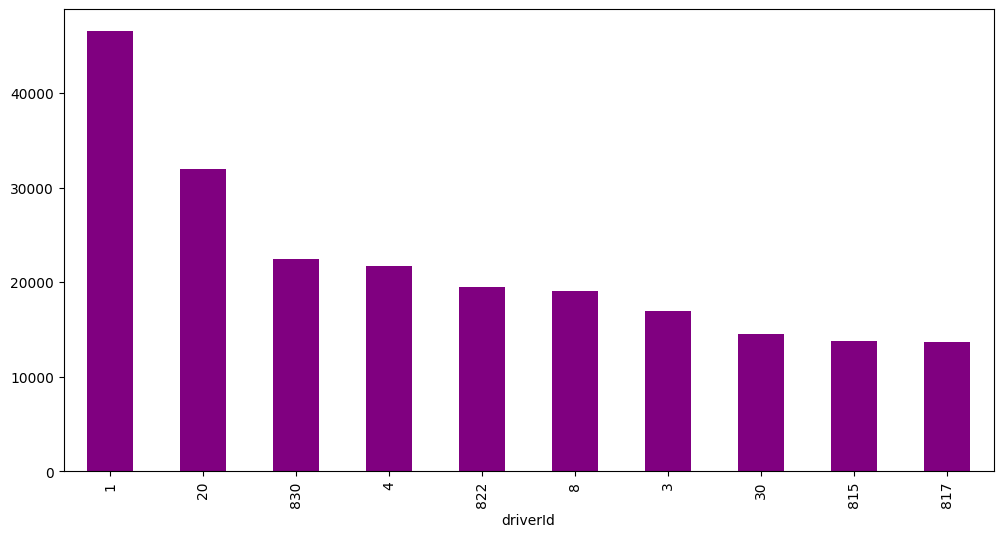

In [41]:
plt.figure(figsize=(12, 6))
top_drivers.plot(kind='bar', color='purple')
plt.bar(sorted_drivers,driver_points )
plt.xlabel('Driver Id')
plt.ylabel('Total Points')
plt.title('Best 10 Drivers in F1 History')
plt.xticks(rotation=45)
plt.show()

**2023 Standings**

In [43]:
#Selected columns
drivers = drivers[["driverId", "driverRef", "nationality"]]
driver_standings = driver_standings[['driverId','raceId', 'points', 'position', 'wins']]

# Merge the DataFrames on the specified columns
combined_driver_info = pd.merge(driver_standings, drivers, on=['driverId'])

# Display the combined DataFrame
combined_driver_info

,driverId,raceId,points,position,wins,driverRef,nationality
0,1,18,10.0,1,1,hamilton,British
1,1,19,14.0,1,1,hamilton,British
2,1,20,14.0,3,1,hamilton,British
3,1,21,20.0,2,1,hamilton,British
4,1,22,28.0,3,1,hamilton,British
...,...,...,...,...,...,...,...
34119,858,1106,0.0,20,0,sargeant,American
34120,858,1107,0.0,19,0,sargeant,American
34121,858,1108,0.0,19,0,sargeant,American
34122,858,1109,0.0,19,0,sargeant,American


In [44]:
#Obtain last year races
races_2023 = races[races['year'] == 2023]
races_2023 = races_2023[['raceId','year','circuitId','name']]
races_2023

,raceId,year,circuitId,name
1079,1098,2023,3,Bahrain Grand Prix
1080,1099,2023,77,Saudi Arabian Grand Prix
1081,1100,2023,1,Australian Grand Prix
1082,1101,2023,73,Azerbaijan Grand Prix
1083,1102,2023,79,Miami Grand Prix
1084,1104,2023,6,Monaco Grand Prix
1085,1105,2023,4,Spanish Grand Prix
1086,1106,2023,7,Canadian Grand Prix
1087,1107,2023,70,Austrian Grand Prix
1088,1108,2023,9,British Grand Prix


In [45]:
#include only the following columns in results
new_results = results[['raceId','constructorId','laps','time','milliseconds','rank','fastestLapTime', 'fastestLapSpeed']]
new_results.head()

,raceId,constructorId,laps,time,milliseconds,rank,fastestLapTime,fastestLapSpeed
0,18,1,58,1:34:50.616,5690616,2,1:27.452,218.300
1,18,2,58,+5.478,5696094,3,1:27.739,217.586
2,18,3,58,+8.163,5698779,5,1:28.090,216.719
3,18,4,58,+17.181,5707797,7,1:28.603,215.464
4,18,1,58,+18.014,5708630,1,1:27.418,218.385


In [46]:
# Merge combined_driver_info and races_2023 on the 'raceId' column
new_dataset = pd.merge(combined_driver_info, races_2023, on='raceId')

# Merge the resulting DataFrame with new_results on the 'raceId' column
new_dataset = pd.merge(new_dataset, new_results, on='raceId')

# Display the head of the new_dataset
new_dataset.head(100)

,driverId,raceId,points,position,wins,driverRef,nationality,year,circuitId,name,constructorId,laps,time,milliseconds,rank,fastestLapTime,fastestLapSpeed
0,1,1098,10.0,5,0,hamilton,British,2023,3,Bahrain Grand Prix,9,57,1:33:56.736,5636736,6,1:36.236,202.452
1,1,1098,10.0,5,0,hamilton,British,2023,3,Bahrain Grand Prix,9,57,+11.987,5648723,7,1:36.344,202.225
2,1,1098,10.0,5,0,hamilton,British,2023,3,Bahrain Grand Prix,117,57,+38.637,5675373,5,1:36.156,202.620
3,1,1098,10.0,5,0,hamilton,British,2023,3,Bahrain Grand Prix,6,57,+48.052,5684788,14,1:37.130,200.588
4,1,1098,10.0,5,0,hamilton,British,2023,3,Bahrain Grand Prix,131,57,+50.977,5687713,10,1:36.546,201.802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,807,1098,0.0,15,0,hulkenberg,German,2023,3,Bahrain Grand Prix,51,56,\N,\N,1,1:33.996,207.276
96,807,1098,0.0,15,0,hulkenberg,German,2023,3,Bahrain Grand Prix,1,55,\N,\N,3,1:35.822,203.327
97,807,1098,0.0,15,0,hulkenberg,German,2023,3,Bahrain Grand Prix,214,41,\N,\N,13,1:36.797,201.278
98,807,1098,0.0,15,0,hulkenberg,German,2023,3,Bahrain Grand Prix,6,39,\N,\N,16,1:37.170,200.506


In [47]:
#most_wins_driver = new_dataset.groupby('driverRef')['points'].sum().sort_values(ascending=False)#.index[0]
#print(f"Driver with the most points in 2023: {most_wins_driver}")

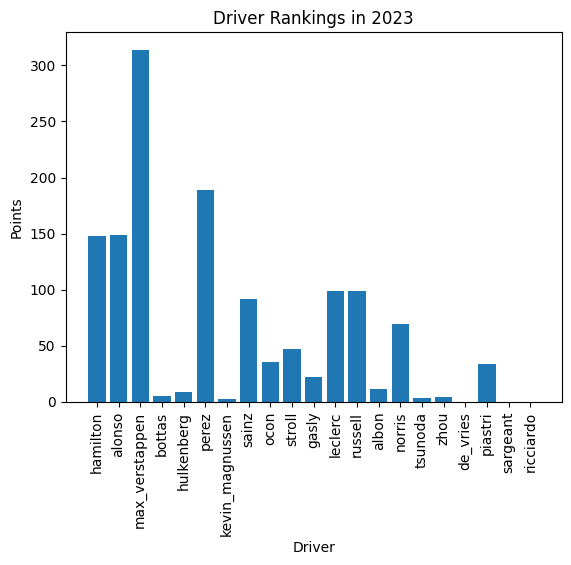

In [48]:
# Extract the required data from new_dataset
driver_names = new_dataset['driverRef'].tolist()
driver_ranks = new_dataset['points'].tolist()

# Create the bar chart
plt.bar(driver_names, driver_ranks)

# Add labels and title
plt.xlabel("Driver")
plt.ylabel("Points")
plt.title("Driver Rankings in 2023")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

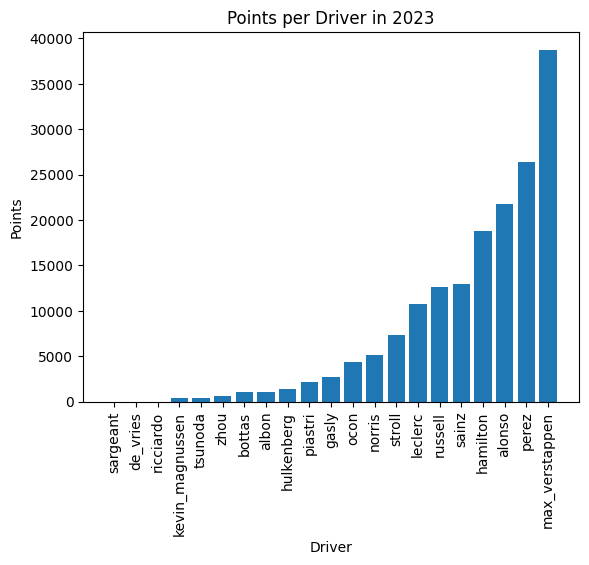

In [49]:
grouped_data = new_dataset[new_dataset['year'] == 2023].groupby('driverRef')['points'].sum().sort_values(ascending=True)

# Extract driver names and points
driver_names = grouped_data.index.tolist()
points = grouped_data.tolist()

# Create the bar plot
plt.bar(driver_names, points)
plt.xlabel("Driver")
plt.ylabel("Points")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.title("Points per Driver in 2023")
plt.show()

In [15]:
# Group the results by constructors and show their rank for the top ten
constructors_rank = results.groupby('constructorId')['rank'].rank()

# Sort the constructors by rank in ascending order
sorted_constructors = constructors_rank.sort_values(ascending=False)

# Print the top 10 constructors and their rank
print(sorted_constructors.head(10))
print(constructors.head(10))

4751     1562.5
17377    1562.5
17448    1562.5
3878     1562.5
17445    1562.5
3881     1562.5
17440    1562.5
17436    1562.5
10740    1562.5
17427    1562.5
Name: rank, dtype: float64
   constructorId constructorRef         name nationality  \
0              1        mclaren      McLaren     British   
1              2     bmw_sauber   BMW Sauber      German   
2              3       williams     Williams     British   
3              4        renault      Renault      French   
4              5     toro_rosso   Toro Rosso     Italian   
5              6        ferrari      Ferrari     Italian   
6              7         toyota       Toyota    Japanese   
7              8    super_aguri  Super Aguri    Japanese   
8              9       red_bull     Red Bull    Austrian   
9             10    force_india  Force India      Indian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/

In [16]:
# Code and Group the results by name constructors and show their rank from the wins for the top ten
# Sort the named constructors by rank in ascending order
# Print the top 10 named constructors and their rank from provided datasets

import pandas as pd
import matplotlib.pyplot as plt
# Group the results by constructors and show their rank for the top ten
constructors_rank = results.groupby('constructorId')['points'].rank()
constructors_rank.name = 'constructor_rank'

# Sort the constructors by rank in ascending order
sorted_constructors = constructors_rank.sort_values(ascending=False)

# Print the top 10 constructors and their rank
print(sorted_constructors.head(10))

# Merge the constructors and results dataframes on the 'constructorId' column
constructors_with_results = pd.merge(constructors, results, on='constructorId')

# Group the results by constructor name and show their rank for the top ten
constructors_rank_by_name = constructors_with_results.groupby('name')['points'].rank()

# Sort the constructors by rank in ascending order
sorted_constructors_by_name = constructors_rank_by_name.sort_values(ascending=False)

# Print the top 10 named constructors and their rank
print(sorted_constructors_by_name.head(10))


25440    2370.5
25400    2370.5
21797    2354.5
24460    2354.5
20320    2354.5
23897    2354.5
23374    2354.5
20560    2354.5
21253    2354.5
23414    2354.5
Name: constructor_rank, dtype: float64
7230    2370.5
7234    2370.5
7248    2354.5
7250    2354.5
6834    2354.5
7134    2354.5
7136    2354.5
6782    2354.5
7138    2354.5
7048    2354.5
Name: points, dtype: float64


In [17]:
# Create a bar plot for the top 10 constructors
top_constructors = pd.merge(results, constructors, on='constructorId')
top_constructors = top_constructors.groupby('constructorId')['rank'].rank()
top_constructors = top_constructors.sort_values(ascending=False).head(10)

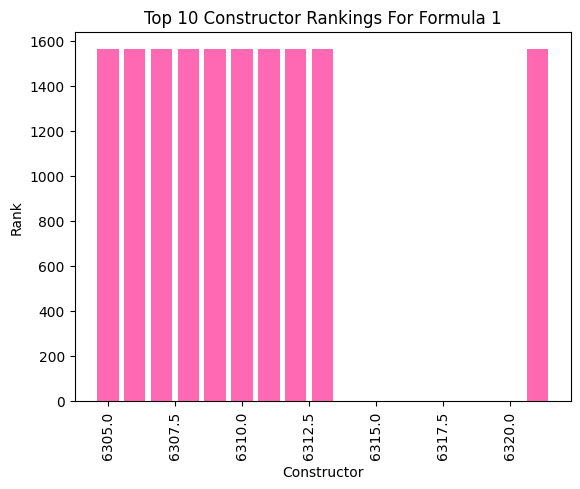

In [18]:
# prompt: code and Fix plt bar with construtor name and rank using datasets provided

import matplotlib.pyplot as plt
# Extract the required data from top_constructors
constructor_names = top_constructors.index.tolist()
constructor_ranks = top_constructors.values.tolist()

# Create the bar chart
plt.bar(constructor_names[:10], constructor_ranks[:10], color='hotpink')

# Add labels and title
plt.xlabel("Constructor")
plt.ylabel("Rank")
plt.title("Top 10 Constructor Rankings For Formula 1")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()